### 1. 图像的卷积操作

In [30]:
import numpy as np
import copy

def convolution(image, kernel):
    h, w = len(image), len(image[0])  # image 的高度、宽度
    k_h, k_w = len(kernel), len(kernel[0]) # kernel 的高度、宽度
    
    res = copy.deepcopy(image)
    h_idx = w_idx = 0
    while h_idx + k_h <= h and w_idx + k_w <= w:
        end_h_idx = h_idx + k_h
        end_w_idx = w_idx + k_w
        sum_val = 0
        for i, r in enumerate(range(h_idx, end_h_idx)):
            for j, c in enumerate(range(w_idx, end_w_idx)):
                sum_val += image[r][c] * kernel[i][j]
        res[h_idx][w_idx] = sum_val
        h_idx += 1 # 卷积核移动
        w_idx += 1
    return res

In [31]:
image = [[1, 2, 3], 
         [4, 5, 6], 
         [7, 8, 9]]

kernel = [[1, 1, 1], 
          [2, 2, 2], 
          [3, 3, 3]]
convolution(image, kernel)

[[108, 2, 3], [4, 5, 6], [7, 8, 9]]

In [21]:
import numpy as np

def convolution(image, kernel):
    h, w, _ = image.shape  # image 的高度、宽度
    k_h, k_w = len(kernel), len(kernel[0]) # kernel 的高度、宽度
    
    image = np.array(image, np.int16)
    res = np.zeros_like(image, dtype=np.int16)
    h_idx = w_idx = 0
    while h_idx + k_h < h and w_idx + k_w < w:
        end_h_idx = h_idx + k_h
        end_w_idx = w_idx + k_w
        sum_val = 0
        for i, r in enumerate(range(h_idx, end_h_idx)):
            for j, c in enumerate(range(w_idx, end_w_idx)):
                sum_val += image[r][c] * kernel[i][j]
        res[h_idx][w_idx] = sum_val
        h_idx += 1 # 卷积核移动
        w_idx += 1
    return res

In [22]:
import cv2 as cv
image = cv.imread(r'C:\Users\Ying\Pictures\Saved Pictures\vogao.jpg')

kernel = [[1, 0, -1], 
          [1, 0, -1], 
          [1, 0, -1]]
res = convolution(image, kernel)

In [25]:
import matplotlib.pyplot as plt

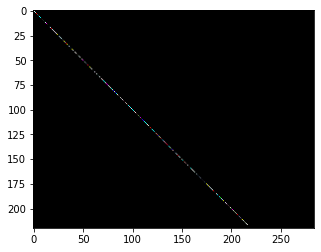

In [27]:
res = np.array(res, np.uint8)
plt.imshow(res)

In [33]:
import numpy as np
import cv2 as cv

def conv(image, kernel):
    res = np.ones_like(image)
    h, w = image.shape
    
    # 对每个元素与算子进行乘积再求和(忽略最外圈边框像素)
    for i in range(1,  h-1):
        for j in range(1, w-1):
            res[i, j] = (image[(i-1):(i+2), (j-1):(j+2)] * kernel).sum()
            
    # 由于卷积后灰度值不一定在0-255之间，统一化成0-255
    res = res * (255.0 / res.max())
    # 返回结果矩阵
    return res

In [36]:
image = cv.imread(r'C:\Users\Ying\Pictures\Saved Pictures\vogao.jpg', 0)

# x方向的Prewitt算子
kernel_x = np.array([[-1, 0, 1],
                    [ -1, 0, 1],
                    [ -1, 0, 1]])

# y方向的Prewitt算子
kernel_y = np.array([[-1,-1,-1],
                     [ 0, 0, 0],
                     [ 1, 1, 1]])

image_x = conv(image, kernel_x)
image_y = conv(image, kernel_y)
res = np.sqrt(image_x**2 + image_y**2)
res = (255.0 / res.max()) * res
res = np.uint8(res)

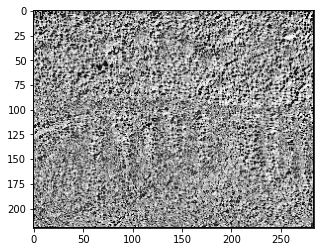

In [37]:
import matplotlib.pyplot as plt

plt.imshow(res, cmap='gray')
plt.show()